In [131]:
from dataset import get_dataset
from torchvision.datasets import Caltech101, Caltech256
import matplotlib.pyplot as plt

from PIL import Image
import json
import numpy as np
import seaborn as sbn

In [178]:
eval_path = "logs/Caltech256_eval.json"
dataset = Caltech256("data", download=False)
class_map = dataset.categories
class_sample = dict()
for i in range(len(dataset)):
    sample, label = dataset[i]
    class_sample[label] = sample

In [179]:
with open(eval_path, "r") as f:
    eval_data = json.load(f)

In [180]:
preds = np.array(eval_data["preds"]["Test"])
labels = np.array(eval_data["labels"]["Test"])

In [181]:
np.sum(preds == labels) / len(preds)

0.6259392355439399

In [182]:
conf_mat = np.zeros((len(class_map), len(class_map)))
for i in range(len(preds)):
    pred = preds[i]
    label = labels[i]
    conf_mat[label][pred] += 1

conf_mat /= np.sum(conf_mat, axis=1, keepdims=True)

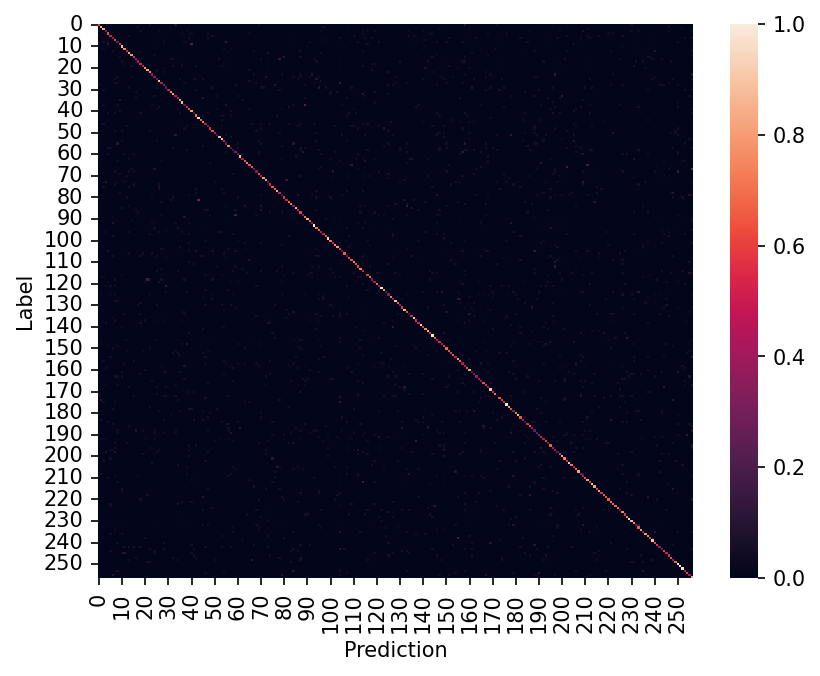

In [183]:
plt.figure(dpi=150)
s = sbn.heatmap(conf_mat)
s.set(xlabel="Prediction", ylabel="Label")
fig = s.get_figure()
fig.savefig("visual/Caltech256_conf.jpg", bbox_inches="tight") 

In [184]:
wrongs = dict()
for label in range(conf_mat.shape[0]):
    for pred in range(conf_mat.shape[1]):
        if label != pred and conf_mat[label, pred] != 0:
            wrongs[(label, pred)] = conf_mat[label][pred]

In [185]:
wrongs = dict(sorted(wrongs.items(), key=lambda x: x[1], reverse=True))

In [187]:
cnt = 0
print(f"Nhãn & Dự đoán & Tỷ lệ sai \\\\\\hline")
for k in wrongs.keys():
    print(f"{class_map[k[0]].split(".")[-1]} & {class_map[k[1]].split(".")[-1]} & {wrongs[k] * 100:.2f}\% \\\\".replace("-", " "))
    class_sample[k[0]].save(f"visual/imgs/{k}_{class_map[k[0]]}.jpg")
    class_sample[k[1]].save(f"visual/imgs/{k}_{class_map[k[1]]}.jpg")
    cnt += 1
    if cnt == 10:
        break

Nhãn & Dự đoán & Tỷ lệ sai \\\hline
fern & clutter & 31.82\% \\
galaxy & comet & 31.25\% \\
chimp & gorilla & 22.73\% \\
beer mug & coffee mug & 21.05\% \\
goose & duck & 18.18\% \\
ewer 101 & teapot & 17.65\% \\
eyeglasses & stirrups & 17.65\% \\
jesus christ & buddha 101 & 17.65\% \\
washing machine & paper shredder & 17.65\% \\
bear & dog & 15.00\% \\


<>:4: SyntaxWarning: invalid escape sequence '\%'
<>:4: SyntaxWarning: invalid escape sequence '\%'
/var/folders/dk/wm1z_d3j63g54ygv05dvsmrm0000gn/T/ipykernel_80787/1039692064.py:4: SyntaxWarning: invalid escape sequence '\%'
  print(f"{class_map[k[0]].split(".")[-1]} & {class_map[k[1]].split(".")[-1]} & {wrongs[k] * 100:.2f}\% \\\\".replace("-", " "))


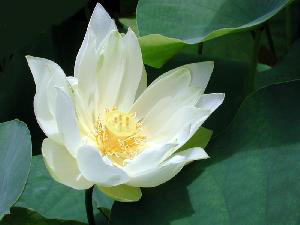

In [172]:
wrong_list = list(wrongs.keys())
